In [1]:
require 'charty'
charty = Charty::Plotter.new(:gruff)

#<Charty::Plotter:0x00007fce5e991040 @plotter_adapter=#<Charty::Gruff:0x00007fce5fc609f0 @plot=Gruff>>

In [2]:
curve = charty.curve do
  # I plan to support function with gruff
  function {|x| Math.sin(x) }
  range x: 0..10, y: -1..1
  xlabel 'foo'
  ylabel 'bar'
end
curve.render
# curve.render("sample_images/curve_with_function_gruff.png")

TypeError: no implicit conversion of nil into String

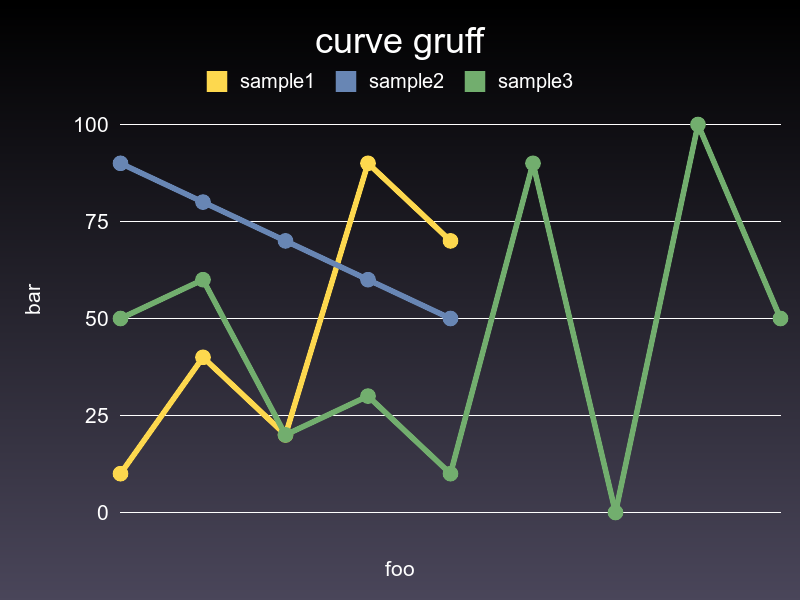

In [3]:
curve2 = charty.curve do
  series [10,40,20,90,70], label: "sample1"
  series [90,80,70,60,50], label: "sample2"
  series [50,60,20,30,10, 90, 0, 100, 50], label: "sample3"
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'curve gruff'
end
curve2.render("sample_images/curve_gruff.png")

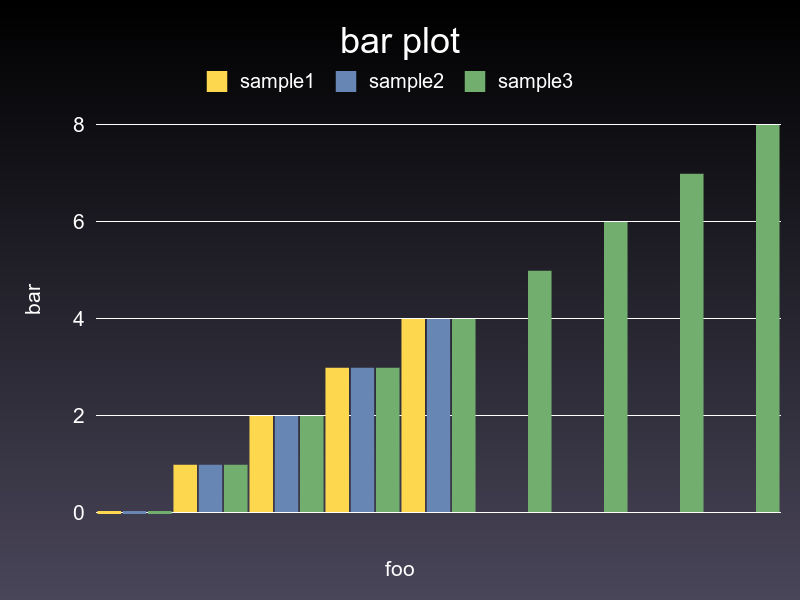

In [4]:
bar = charty.bar do
  series [0,1,2,3,4], label: "sample1"
  series [0,1,2,3,4], label: "sample2"
  series [0,1,2,3,4,5,6,7,8], label: "sample3"
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'bar plot'
end
bar.render("sample_images/bar_gruff.png")

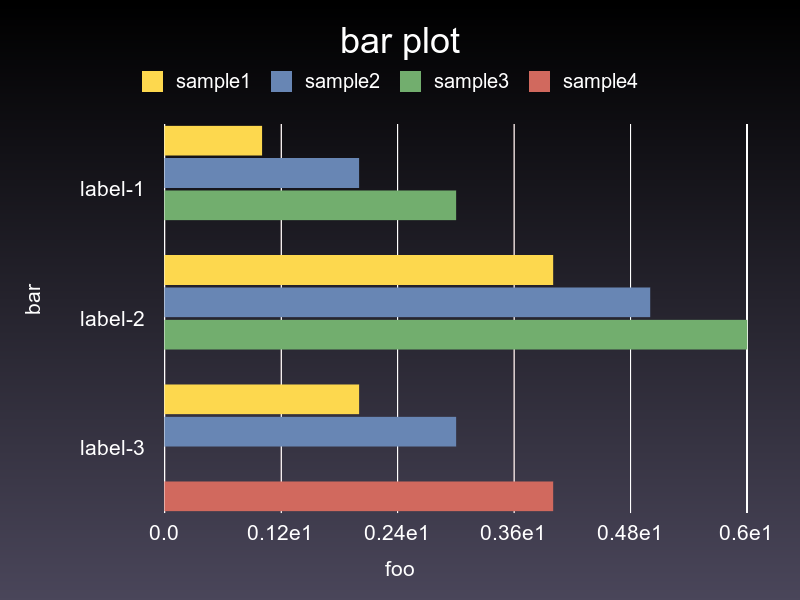

In [11]:
barh = charty.barh do
  series ["sample1","sample2","sample3"], [1,2,3], label: "label-1"
  series ["sample1","sample2","sample3"], [4,5,6], label: "label-2"
  series ["sample1","sample2","sample4"], [2,3,4], label: "label-3"
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'bar plot'
end
barh.render("sample_images/barh_gruff.png")

In [12]:
boxplot = charty.boxplot do
  data [[60,70,80,70,50], [100,40,20,80,70], [30, 10]]
  range x: 0..10, y: 1..100
  xlabel 'foo'
  ylabel 'bar'
  title 'box plot'
end
boxplot.render("sample_images/boxplot_gruff.png")

NoMethodError: undefined method `boxplot' for #<Charty::Plotter:0x00007fce5e991040>
Did you mean?  box_plot

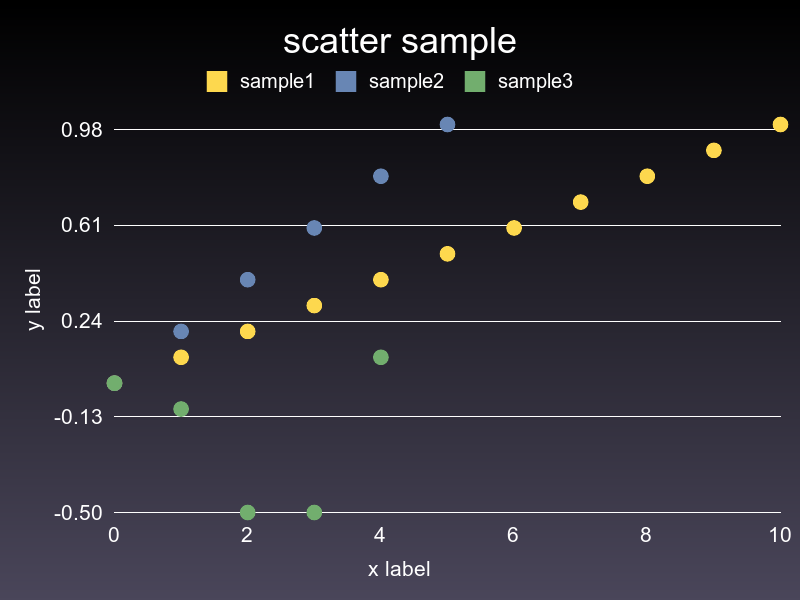

In [13]:
scatter = charty.scatter do
  series 0..10, (0..1).step(0.1), label: 'sample1'
  series 0..5, (0..1).step(0.2), label: 'sample2'
  series [0, 1, 2, 3, 4], [0, -0.1, -0.5, -0.5, 0.1], label: 'sample3'
  range x: 0..10, y: -1..1
  xlabel 'x label'
  # xlabel ''
  ylabel 'y label'
  title 'scatter sample'
end
scatter.render("sample_images/scatter_gruff.png")

In [14]:
layout = charty.layout

#<Charty::Layout:0x00007fce5e9d7d38 @frontend=#<Charty::Gruff:0x00007fce5fc609f0 @plot=Gruff, @series=[#<struct Charty::Series xs=0..10, ys=((0..1).step(0.1)), zs=nil, xerr=nil, yerr=nil, label="sample1">, #<struct Charty::Series xs=0..5, ys=((0..1).step(0.2)), zs=nil, xerr=nil, yerr=nil, label="sample2">, #<struct Charty::Series xs=[0, 1, 2, 3, 4], ys=[0, -0.1, -0.5, -0.5, 0.1], zs=nil, xerr=nil, yerr=nil, label="sample3">]>, @layout=#<Charty::ArrayLayout:0x00007fce5e9d7c98 @array=[], @direction=:horizontal>>

In [15]:
layout << curve
layout << scatter
layout.render("sample_images/subplot_gruff.png")

NotImplementedError: NotImplementedError

In [16]:
curve_list = [0.5, 0.75].map do |f|
  charty.curve(f:f) do
    function {|x| Math.sin(f*x) }
    range x: 0..10, y: -1..1
  end
end

scatter_list = [-0.5, 0.5].map do |f|
   charty.scatter(f: f) do
    series Charty::Linspace.new(0..10, 20), Charty::Linspace.new(0..f, 20)
    range x: 0..10, y: -1..1
  end
end

grid_layout = charty.layout(:grid2x2)
grid_layout << curve_list
grid_layout << scatter_list
grid_layout.render("sample_images/subplot2_gruff.png")

NotImplementedError: NotImplementedError

In [17]:
errorbar = charty.errorbar do
  series [1,2,3,4], [1,4,9,16], label: 'label1'
  series [1,2,3,4], [16,9,4,1], label: 'label2'
  range x: 0..10, y: -1..20
  yerr [0.6,0.7,2.1,1.4]
  xerr [0.1,0.2,0.3,1.4]
  xlabel 'x label'  
  title 'errorbar'
end
errorbar.render("sample_images/errorbar_gruff.png")

NoMethodError: undefined method `errorbar' for #<Charty::Plotter:0x00007fce5e991040>
Did you mean?  error_bar

In [18]:
bubble = charty.bubble do
  series 0..10, (0..1).step(0.1), [10, 100, 1000, 20, 200, 2000, 5, 50, 500, 4, 40], label: 'sample1'
  series 0..5, (0..1).step(0.2), [1, 10, 100, 1000, 500, 100], label: 'sample2'
  series [0, 1, 2, 3, 4], [0, -0.1, -0.5, -0.5, 0.1], [40, 30, 200, 10, 5]
  range x: 0..10, y: -1..1
  xlabel 'x label'
  ylabel 'y label'
  title 'scatter sample'
end
bubble.render("sample_images/bubble_gruff.png")

NotImplementedError: NotImplementedError

In [19]:
hist = charty.hist do
  data [[10, 10, 20, 30, 40, 40,40,40,40,40, 50, 10, 10, 10], [100, 100, 100, 100, 90, 90, 80, 30, 30, 30, 30, 30]]
  range x: 0..100, y: -5..10
  xlabel 'x label'
  ylabel 'y label'
  title 'scatter sample'
end
hist.render("sample_images/hist_gruff.png")

NotImplementedError: NotImplementedError